In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Разминка

1.1 Создание матриц

In [ ]:
A = np.zeros((6, 3))
A[::2, ::2] = 1
A[1::2, 1::2] = 1

B = np.arange(1, 25).reshape(6, 4)
for i in range(1, 6, 2):
    B[i][::] = B[i][::-1]

C = np.random.randint(2, 11, size=(4, 3))

D = np.zeros((4, 4))
for i in range(4):
    for j in range(4):
        if i == j:
            D[i][j] = 1
S = np.vstack((np.hstack((A, B)), np.hstack((C, D))))

F = np.zeros((10, 2))

G = np.hstack((S, F))

1.2 Поиск ближайшего соседа

In [ ]:
def find_nearest_neighbour(X, a):
    return X.flat[np.abs(X - a).argmin()]

1.3 Очень странная нейросеть

In [587]:
A = np.arange(16).reshape((4, 4))
b = np.arange(4)
X = np.arange(4)

def very_strange_neural_network(A, b, X):
    A_in_square = np.dot(A, A)
    first_mutation = np.dot(X, A_in_square)
    second_mutation = np.dot(first_mutation, b)
    return second_mutation

print(very_strange_neural_network(A, b, X))

13720


1.4 Джунгли зовут

In [598]:
def find_deep_sea_area(M):
    return np.sum(M < -5)

def find_water_volume(M):
    sea = M < 0
    return np.sum(np.abs(M[sea]))

def find_max_height(M):
    return np.max(M)

M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

assert np.isclose(find_deep_sea_area(M), 1)
assert np.isclose(find_water_volume(M), 21)
assert np.isclose(find_max_height(M), 25)

print("Общая площадь моря на карте -", find_deep_sea_area(M), "м^2")
print("Общий объем воды на карте -", find_water_volume(M), "м^3")
print("Максимальный уровень над уровнем моря на карте -", find_max_height(M), "м")

Общая площадь моря на карте - 1 м^2
Общий объем воды на карте - 21 м^3
Максимальный уровень над уровнем моря на карте - 25 м


1.5 Острова сокровищ

In [599]:
def count_all_islands(a):
    our_diffs = np.diff(a)
    starts = np.sum(our_diffs == 1)
    if a[0] == 1:
        starts += 1
    return starts

a = np.array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])
assert count_all_islands(a) == 4
print(count_all_islands(a))

4


1.6 Маскарад

In [605]:
def swap_mask_for_average(X, a):
    sr = np.mean(X)
    bool_mask = X > a
    X[bool_mask] = sr
    return X

M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])
a = 5

assert np.allclose(swap_mask_for_average(M, a),
                   np.array([
                       [-7, -3, -1, 0],
                       [-4, -3, 1, 2],
                       [-2, 0, 4, 2],
                       [-1, 3, 2, 2]
                   ]))

swap_mask_for_average(M, a)

array([[-7, -3, -1,  0],
       [-4, -3,  1,  2],
       [-2,  0,  4,  2],
       [-1,  3,  2,  2]])

1.7 По горячим трейсам

In [611]:
def count_trace_diff(M):
    sum_on_main_diagonal = np.trace(M)
    M = np.fliplr(M)
    sum_on_side_diagonal = np.trace(M)
    return sum_on_main_diagonal - sum_on_side_diagonal

M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

assert np.allclose(count_trace_diff(M), 3)

count_trace_diff(M)

np.int64(3)

1.8 Царь горы

In [11]:
def create_mountain(a):
    main_block = a[:, None] + a[None, :]
    top_block = np.concatenate((main_block, np.fliplr(main_block)), axis=1)
    bottom_block = np.flipud(top_block)
    mountain = np.concatenate((top_block, bottom_block))
    return mountain

a = np.array([0, 1, 2, 3, 4])

create_mountain(a)

array([[0, 1, 2, 3, 4, 4, 3, 2, 1, 0],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [0, 1, 2, 3, 4, 4, 3, 2, 1, 0]])

1.9 Монохромная фотография 9 на 12

In [14]:
def custom_blur(P, C):
    N, M = P.shape
    photo = np.ones((N-C+1, M-C+1))
    for i in range(N-C+1):
        for j in range(M-C+1):
            photo[i][j] = np.mean(P[i:i+C, j:j+C])
    return photo

P = np.arange(0, 12).reshape((3, 4))
kernel = 2

assert np.allclose(custom_blur(P, kernel),
                   np.array([[2.5, 3.5, 4.5], [6.5, 7.5, 8.5]]))
custom_blur(P, 2 )

array([[2.5, 3.5, 4.5],
       [6.5, 7.5, 8.5]])

1.10 Функция проверки

In [51]:
def check_successful_broadcast(*shapes):
    if len(shapes) < 2:
        return False
    
    max_dims = max(len(shape) for shape in shapes)
    
    aligned_shapes = [((1,) * (max_dims - len(shape))) + shape for shape in shapes]
    
    for shape1, shape2 in zip(aligned_shapes, aligned_shapes[1:]):
        for dim1, dim2 in zip(reversed(shape1), reversed(shape2)):
            if dim1 != dim2 and dim1 != 1 and dim2 != 1:
                return False
                
    return True

assert check_successful_broadcast((5, 6, 7), (6, 7), (1, 7))

1.11 Попарные расстояния

In [21]:
def pairwise_distances(A, B):
    return np.sqrt(((A[:, None, :] - B[None, :, :]) ** 2).sum(axis=2))

A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) 
B = np.array([[10, 11, 12], [13, 14, 15]])

pairwise_distances(A, B)

array([[15.58845727, 20.78460969],
       [10.39230485, 15.58845727],
       [ 5.19615242, 10.39230485]])

Принцип работы:
Вычисляется евклидово расстояние между каждой строкой матрицы A и каждой строкой матрицы B. Для этого используется broadcasting (расширение до нужной размерности). Потом находятся разности координат, возводятся в квадрат, суммируются и берётся корень.

2.1 Постановка задачи и данные

In [25]:
data = pd.read_csv("data_numpy_lab.csv")
data.head()

,Unnamed: 0,N,"t, sec","sigma_t, sec","mass, gramm","length, cm","phi, rad"
0,1,4,268,1,180.0,121.0,0.16
1,2,4,264,1,180.0,121.0,0.18
2,3,4,275,1,180.0,121.0,0.16
3,4,4,263,1,180.0,121.0,0.17
4,5,4,267,1,180.0,121.0,0.17


2.2 Работа с данными

In [33]:
data["mass"] = data["mass, gramm"] / 1000
data["length"] = data["length, cm"] / 100

data = data.rename(columns={
    "Unnamed: 0": "index",
    "t, sec": "t",
    "sigma_t, sec": "sigma_t",
    "phi, rad": "phi"
})
data = data.drop(["mass, gramm", "length, cm"], axis=1)

assert data.mass.mean() < 0.3
assert np.allclose(data.length.mean(), 1.155)
assert all(' ' not in column for column in data.columns)

data.head()

,index,N,t,sigma_t,phi,mass,length
0,1,4,268,1,0.16,0.18,1.21
1,2,4,264,1,0.18,0.18,1.21
2,3,4,275,1,0.16,0.18,1.21
3,4,4,263,1,0.17,0.18,1.21
4,5,4,267,1,0.17,0.18,1.21


In [37]:
data["omega"] = 2 * np.pi * data["N"] / data["t"]
data["sigma_omega"] = data["omega"] / data["t"] * data["sigma_t"]
data["omega_down"] = data["phi"] / data["t"]
data["sigma_down"] = data["omega_down"] * data["sigma_t"] / data["t"]
g = 9.8
data["momentum"] = data["mass"] * g * data["length"]
data["momentum_down"] = data["mass"] * data["phi"] / (data["t"]**2) * (data["length"]**2)
data["sigma_momentum"] = data["momentum_down"] * 2 * data["sigma_t"] / data["t"]

assert np.allclose(data.momentum_down.iloc[0], 5.892e-07)
assert np.allclose(data.sigma_omega[0:5], 3.5e-04, atol=3e-5)
assert np.allclose(data.sigma_momentum[0:5], 4.4e-09, atol=1e-9)

data.head()

,index,N,t,sigma_t,phi,mass,length,omega,sigma_omega,omega_down,sigma_down,momentum,momentum_down,sigma_momentum
0,1,4,268,1,0.16,0.18,1.21,0.093779,0.000350,0.000597,0.000002,2.13444,5.870751e-07,4.381157e-09
1,2,4,264,1,0.18,0.18,1.21,0.095200,0.000361,0.000682,0.000003,2.13444,6.806250e-07,5.156250e-09
2,3,4,275,1,0.16,0.18,1.21,0.091392,0.000332,0.000582,0.000002,2.13444,5.575680e-07,4.055040e-09
3,4,4,263,1,0.17,0.18,1.21,0.095562,0.000363,0.000646,0.000002,2.13444,6.477101e-07,4.925552e-09
4,5,4,267,1,0.17,0.18,1.21,0.094130,0.000353,0.000637,0.000002,2.13444,6.284484e-07,4.707479e-09


In [43]:
grouped_data = data.groupby("mass")[["omega", "sigma_omega", "momentum", "momentum_down", "sigma_momentum", "omega_down", "sigma_down"]].mean()

assert 0.273 in grouped_data.index
assert np.allclose(grouped_data.omega[0.273], 0.1433)

grouped_data

,omega,sigma_omega,momentum,momentum_down,sigma_momentum,omega_down,sigma_down
mass,,,,,,,
0.142,0.066661,0.000236,1.683836,4.108862e-07,2.906917e-09,0.000559,0.000002
0.180,0.094012,0.000352,2.134440,6.202853e-07,4.645096e-09,0.000629,0.000002
0.216,0.081687,0.000354,2.286144,7.755223e-07,6.721701e-09,0.000710,0.000003
0.273,0.143300,0.000817,3.263988,2.166527e-06,2.470970e-08,0.000935,0.000005
0.341,0.150752,0.000723,3.675980,1.577406e-06,1.514038e-08,0.000797,0.000004
0.614,0.185194,0.000910,6.679092,3.030996e-06,2.978946e-08,0.000815,0.000004


2.3 Постые графики и МНК

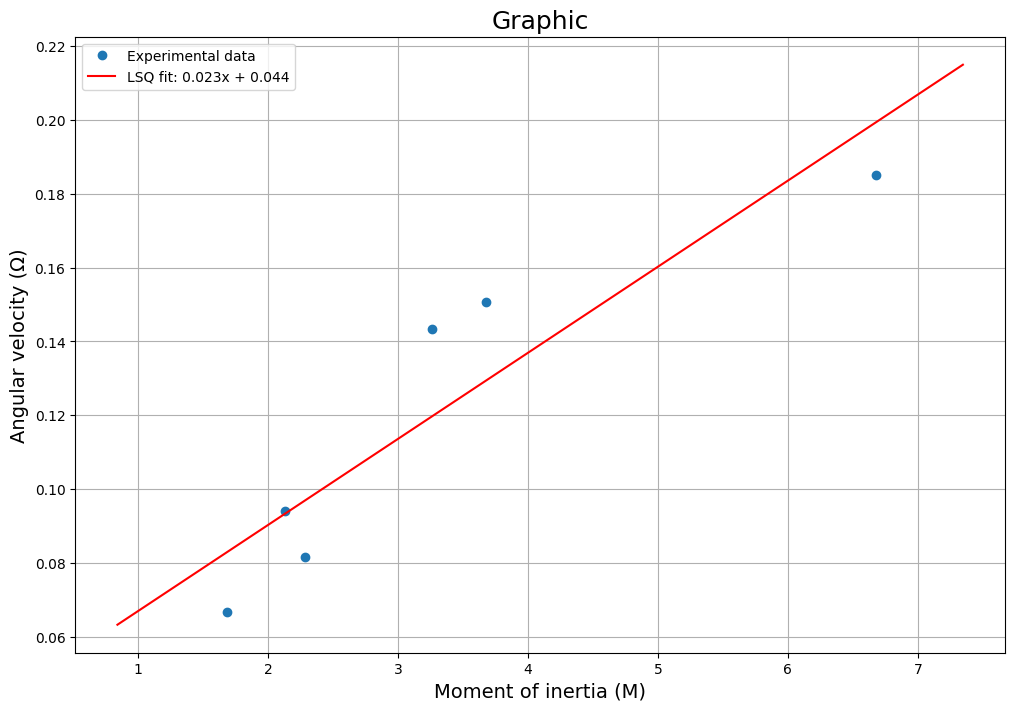

In [46]:
omega_np = np.array(grouped_data.omega)
momentum_np = np.array(grouped_data.momentum)

coefs = np.polyfit(momentum_np, omega_np, 1)

x_lsq = np.linspace(momentum_np.min() * 0.5, momentum_np.max() * 1.1, 100)

y_lsq = np.polyval(coefs, x_lsq)

fig = plt.figure(figsize=(12, 8))

plt.plot(momentum_np, omega_np, 'o', label='Experimental data')
plt.plot(x_lsq, y_lsq, 'r-', label=f'LSQ fit: {coefs[0]:.3f}x + {coefs[1]:.3f}')

plt.grid(True)
plt.xlabel('Moment of inertia (M)', fontsize=14)
plt.ylabel('Angular velocity (Ω)', fontsize=14)
plt.title('Graphic', fontsize=18)
plt.legend()
plt.show()

In [47]:
grouped_data['sigma_down'] *= 10
grouped_data['sigma_momentum'] *= 10

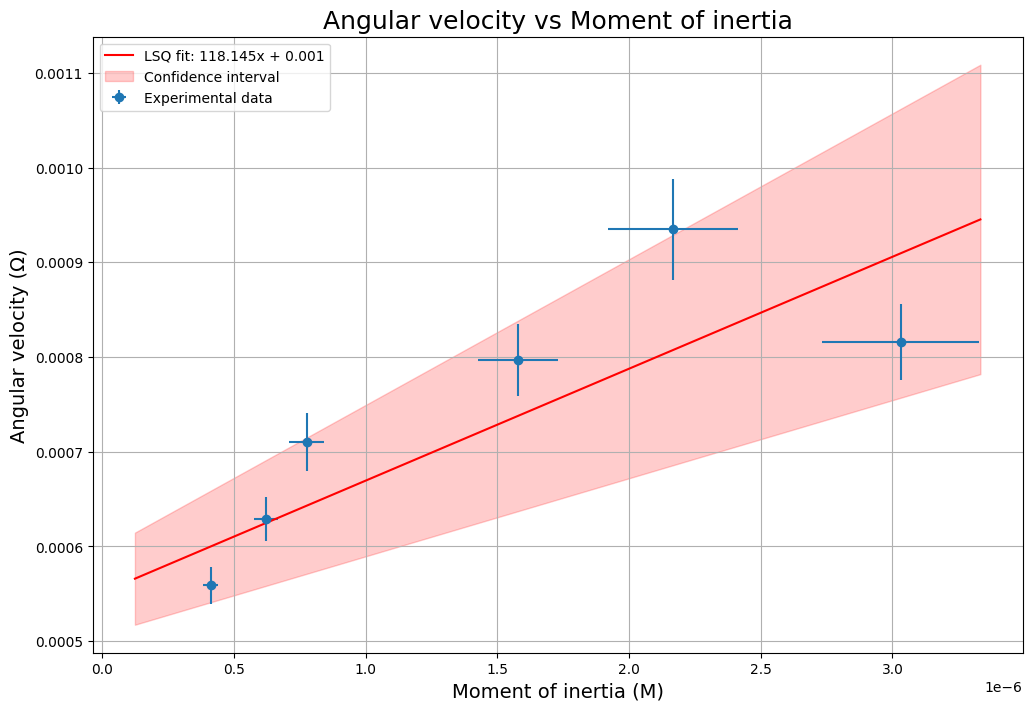

In [48]:
omega_down = np.array(grouped_data['omega_down'])
momentum_down = np.array(grouped_data['momentum_down'])
sigma_down = np.array(grouped_data['sigma_down'])

weights = 1 / sigma_down
coefs, cov = np.polyfit(momentum_down, omega_down, deg=1, w=weights, cov=True)

x_fit = np.linspace(momentum_down.min() * 0.3, momentum_down.max() * 1.1, 100)
lsq_stds = np.sqrt(np.diag(cov))

y_fit = coefs[0] * x_fit + coefs[1]
y_fit_lower = (coefs[0] - lsq_stds[0]) * x_fit + (coefs[1] - lsq_stds[1])
y_fit_upper = (coefs[0] + lsq_stds[0]) * x_fit + (coefs[1] + lsq_stds[1])

plt.figure(figsize=(12, 8))

plt.errorbar(momentum_down, omega_down, 
             xerr=grouped_data['sigma_momentum'], yerr=grouped_data['sigma_down'],
             fmt='o', label='Experimental data')

plt.plot(x_fit, y_fit, 'r-', label=f'LSQ fit: {coefs[0]:.3f}x + {coefs[1]:.3f}')

plt.fill_between(x_fit, y_fit_lower, y_fit_upper, color='red', alpha=0.2, 
                 label='Confidence interval')

plt.grid(True)
plt.xlabel('Moment of inertia (M)', fontsize=14)
plt.ylabel('Angular velocity (Ω)', fontsize=14)
plt.title('Angular velocity vs Moment of inertia', fontsize=18)
plt.legend()
plt.show()

3. Работа с датасетом

In [52]:
sns.set_style("darkgrid")

In [62]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris["Species"] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [69]:
iris["Species"].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

3.1 Графики длины и ширины лепестка ириса

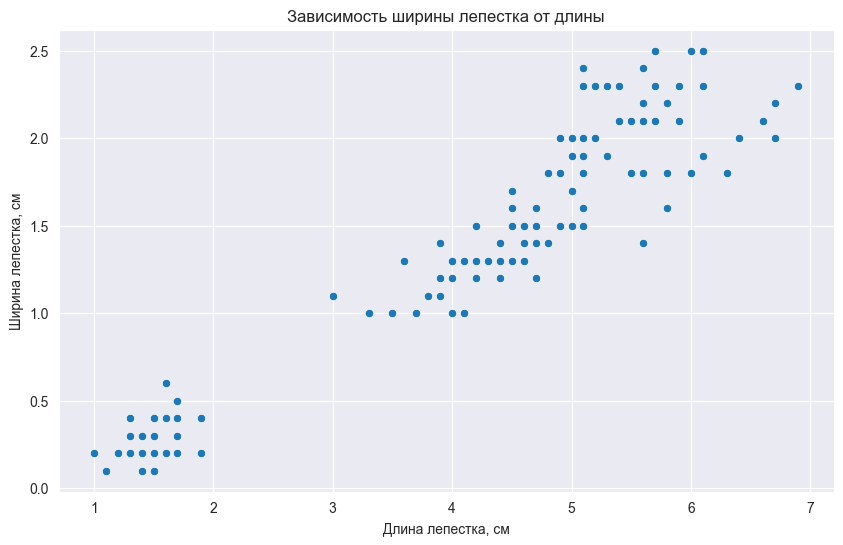

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris, x='petal length (cm)', y='petal width (cm)')
plt.title('Зависимость ширины лепестка от длины')
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.show()

Выводы из графика:
График даёт в принципе понимание зависимости ширины лепестка от длины, но отсутствует информация про виды ириса. То есть у нас в зависимости перемешены данные для разных типов цветов, что не есть норм.

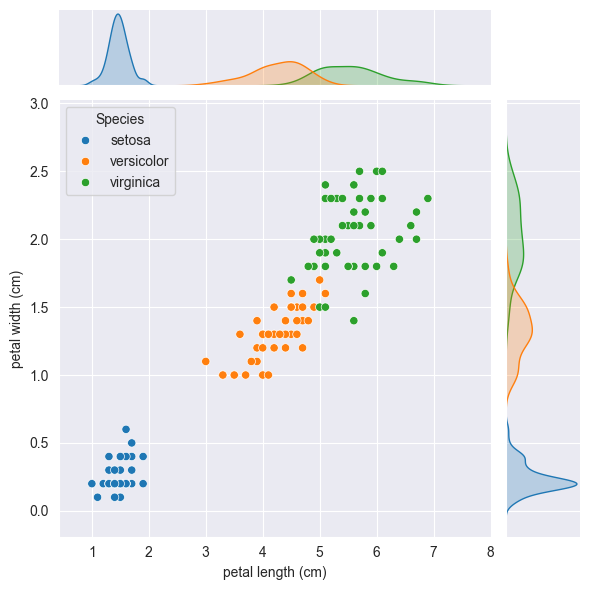

In [71]:
sns.jointplot(data=iris, x='petal length (cm)', y='petal width (cm)', hue='Species')
plt.show()

Графики демонстрируют явную зависимость между длиной и шириной лепестка. Различные виды ирисов на графике в отдельных группах, что разумно. Jointplot кажется лучшим выбором, поскольку одновременно отображает распределения и взаимосвязь между параметрами.

3.2 Графики распределений значений длины лепестка

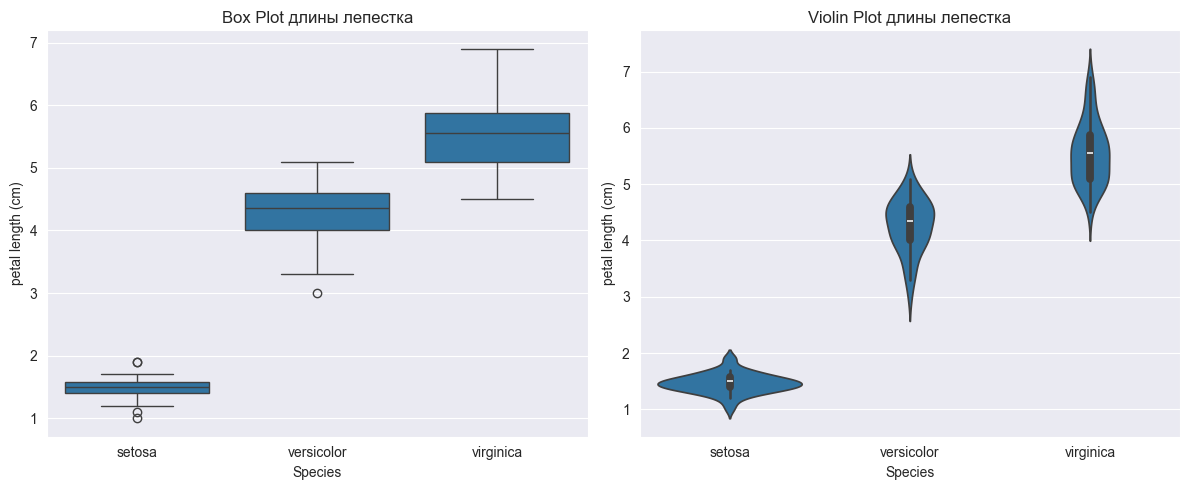

In [72]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=iris, x='Species', y='petal length (cm)')
plt.title('Box Plot длины лепестка')

plt.subplot(1, 2, 2)
sns.violinplot(data=iris, x='Species', y='petal length (cm)')
plt.title('Violin Plot длины лепестка')

plt.tight_layout()
plt.show()

Violin plot предоставляет более детальную информацию, отображая распределение значений, тогда как Box plot более прост. Оба графика демонстрируют, что виды ирисов заметно различаются по длине лепестка.

3.3 Попарные графики взаимосвязи признаков

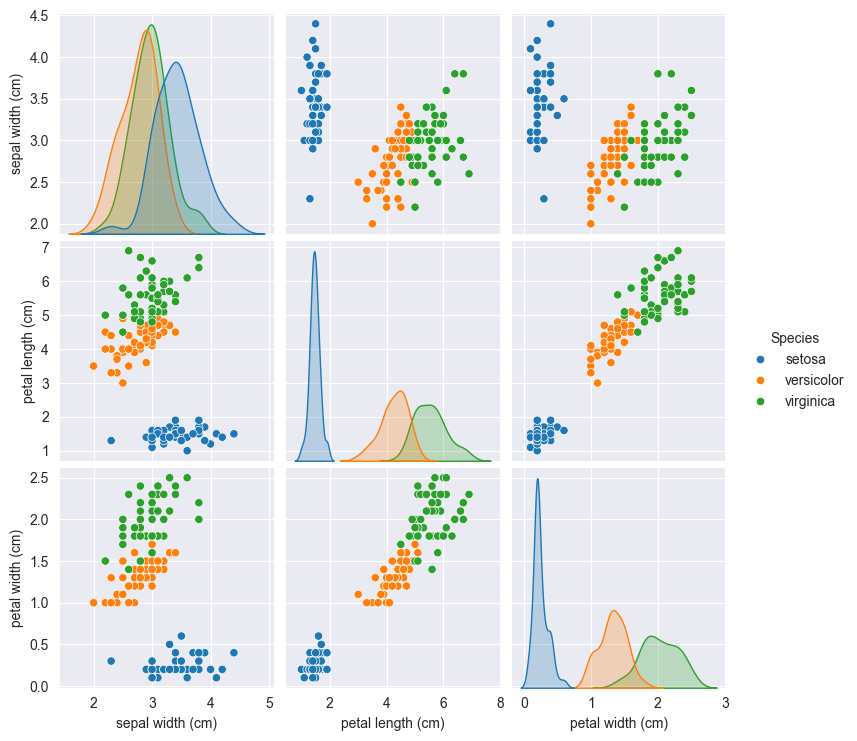

In [73]:
sns.pairplot(data=iris, hue='Species')
plt.show()

График показывает, что длина и ширина лепестка тесно связаны: более длинные лепестки обычно шире. Разные виды ирисов четко разделяются по этим характеристикам: лепестки у setosa самые маленькие, у virginica — самые крупные, а versicolor занимает промежуточное положение. Интересно, что размеры чашелистиков (sepal) не дают столь явного разделения, хотя некоторые закономерности все же присутствуют. Таким образом, размеры лепестков можно считать отличными характеристиками для определения вида ириса.

На диагонали таблицы расположены гистограммы, отражающие распределение каждого признака (длина и ширина чашелистика, длина и ширина лепестка) для разных видов ирисов. Эти гистограммы показывают частоту встречаемости различных значений признаков у каждого вида. Например, видно, что длина лепестка у setosa чаще всего составляет около 1.5 см, у versicolor — около 4 см, а у virginica — около 5.5 см.

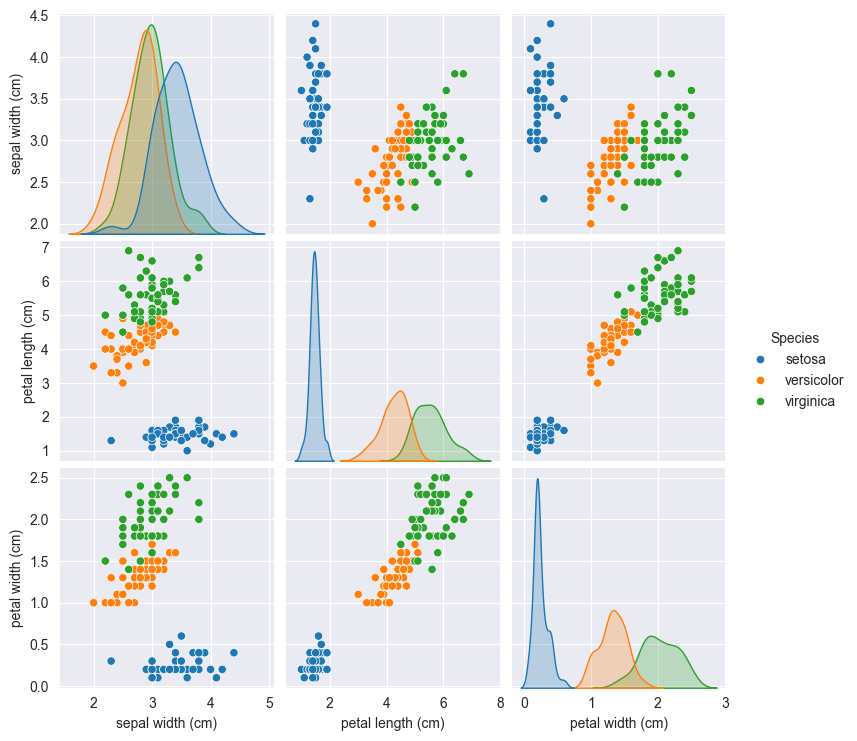

In [74]:
sns.pairplot(data=iris, hue='Species', diag_kind='kde')
plt.show()

Теперь на диагонали таблицы представлены графики плотности распределения (KDE, kernel density estimation) для каждого признака. В отличие от гистограмм, KDE обеспечивает сглаженную и непрерывную визуализацию, что делает распределения более плавными и наглядными. Такие графики позволяют четче понять форму распределения и выявить количество пиков (модальность). Это представление оказалось более информативным, так как оно облегчает сравнение распределений разных видов ирисов и помогает увидеть области их пересечения.